# ImageNet 데이터셋 검증 
> DenseNet121

### import

In [1]:
import os
from datetime import datetime

#### GPU 사용여부# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print(tf.__version__)

2.9.0


#### GPU 사용여부

In [2]:
print("GPU is", "available" if len(tf.config.list_physical_devices('GPU')) > 0 else "NOT AVAILABLE")

GPU is available


# ImageNet load

In [3]:
# Get imagenet labels
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# Set data_dir to a read-only storage of .tar files
# Set write_dir to a w/r storage
data_dir = "C:/Users/DI_king/Desktop/바탕 화면/Research/dataset/imageNet/"
write_dir = "C:/Users/DI_king/Desktop/바탕 화면/Research/dataset/tf-imageNet-dirs/"

# Construct a tf.data.Dataset
download_config = tfds.download.DownloadConfig(
                      extract_dir=os.path.join(write_dir, 'extracted'),
                      manual_dir=data_dir
                  )
download_and_prepare_kwargs = {
    'download_dir': os.path.join(write_dir, 'downloaded'),
    'download_config': download_config,
}
ds = tfds.load('imagenet2012_subset', 
               data_dir=os.path.join(write_dir, 'data'),         
               split='validation', 
               shuffle_files=False, 
               download=True, 
               as_supervised=True,
               download_and_prepare_kwargs=download_and_prepare_kwargs)

# DenseNet121

### Preprocess for DenseNet121

image shape: (1, 224, 224, 3) label: ['European fire salamander']


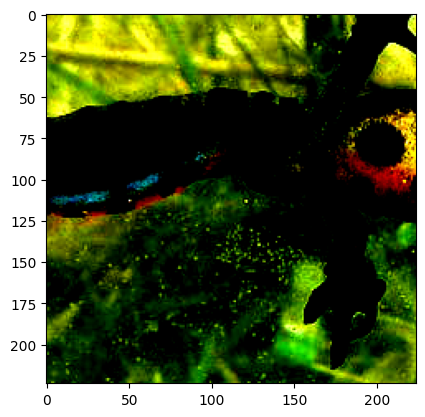

image shape: (1, 224, 224, 3) label: ['mushroom']


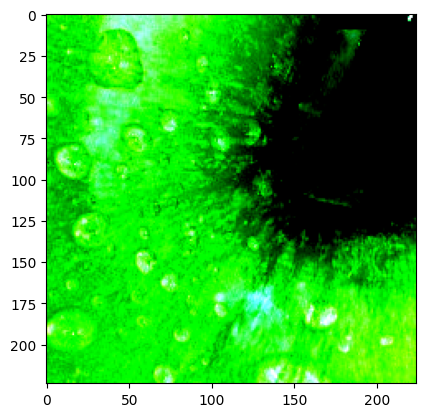

In [4]:
# Preprocess the images
def resize_with_crop_DenseNet121(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 224, 224)
    i = tf.keras.applications.densenet.preprocess_input(i)
    return (i, label)

ds_DenseNet121 = ds.map(resize_with_crop_DenseNet121)

# Plot a few
ds_DenseNet121 = ds_DenseNet121.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_DenseNet121.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

# Original weight

## Evaluation

In [5]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights='imagenet')
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

33188688/33188688 [==============================] - 1s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

                                                                                                  
 conv2_block4_0_relu (Activatio  (None, 56, 56, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_blo

 conv3_block6_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
          

                                                                                                  
 conv3_block10_concat (Concaten  (None, 28, 28, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 32)   36864       ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block7_0_relu (Activatio  (None, 14, 14, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block15_concat (Concaten  (None, 14, 14, 736)  0          ['conv4_block14_concat[0][0]',   
 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block24_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
          

 conv5_block4_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
          

                                                                                                  
 conv5_block8_concat (Concatena  (None, 7, 7, 768)   0           ['conv5_block7_concat[0][0]',    
 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_0_relu (Activati  (None, 7, 7, 896)   0           ['conv5_block13_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
          

Total params: 8,062,504
Trainable params: 0
Non-trainable params: 8,062,504
__________________________________________________________________________________________________


In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

<Evaluate model>


C:\Users\DI_king\anaconda3\envs\slim\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


26259/50000 [==============>...............] - ETA: 4:27 - loss: 1.2924 - accuracy: 0.6936

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 30bit weight (zero to last 2-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_30bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 28bit weight (zero to 4-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_28bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 26bit weight (zero to 6-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_26bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 24bit weight (zero to 8-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_24bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 22bit weight (zero to 10-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_22bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 20bit weight (zero to 12-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_20bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 18bit weight (zero to 14-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_18bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 16bit weight (zero to 16-bit) - half

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_16bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 14bit weight (zero to 18-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_14bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 12bit weight (zero to 20-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_12bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 10bit weight (zero to 22-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_10bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 8bit weight (zero to 24-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_8bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 6bit weight (zero to 26-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_6bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 4bit weight (zero to 28-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_4bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

# 2bit weight (zero to 30-bit)

## Evaluation

In [ ]:
model_DenseNet121 = tf.keras.applications.densenet.DenseNet121(include_top=True,
                                                     weights=r"C:\Users\DI_king\Desktop\바탕 화면\Research\dataset\densenet\densenet121_weights_tf_dim_ordering_tf_kernels_2bit.h5")
model_DenseNet121.trainable = False
model_DenseNet121.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_DenseNet121.summary()

In [ ]:
decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_DenseNet121 = model_DenseNet121.evaluate(ds_DenseNet121)

In [ ]:
print(dict(zip(model_DenseNet121.metrics_names, result_DenseNet121)))

---
---
---

# Visualization
> top-1 accuracy

In [51]:
accuracy_decend = accuracy_acend[::-1]
accuracy_decend

[0.7634199857711792,
 0.763480007648468,
 0.7634999752044678,
 0.7634599804878235,
 0.7634400129318237,
 0.7635400295257568,
 0.7635800242424011,
 0.7632799744606018,
 0.7630000114440918,
 0.7623999714851379,
 0.7430599927902222,
 0.12916000187397003,
 0.0012400000123307109,
 0.0010000000474974513,
 0.0010000000474974513,
 0.0010000000474974513]

In [57]:
bit_accend = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
bit_decend = bit_accend[::-1]

In [59]:
bit_decend

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2]

### 전체적인 시각화

| bit (assumption) | accuracy |
| --- | --- |
| 32 | 0.7634199857711792 |
| 30 | 0.763480007648468 |
| 28 | 0.7634999752044678 |
| 26 | 0.7634599804878235 |
| 24 | 0.7634400129318237 |
| 22 | 0.7635400295257568 |
| 20 | 0.7635800242424011 |
| 18 | 0.7632799744606018 |
| 16 | 0.7630000114440918 |
| 14 | 0.7623999714851379 |
| 12 | 0.7430599927902222 |
| 10 | 0.12916000187397003 |
| 8 | 0.0012400000123307109 |
| 6 | 0.0010000000474974513 |
| 4 | 0.0010000000474974513 |
| 2 | 0.0010000000474974513 |

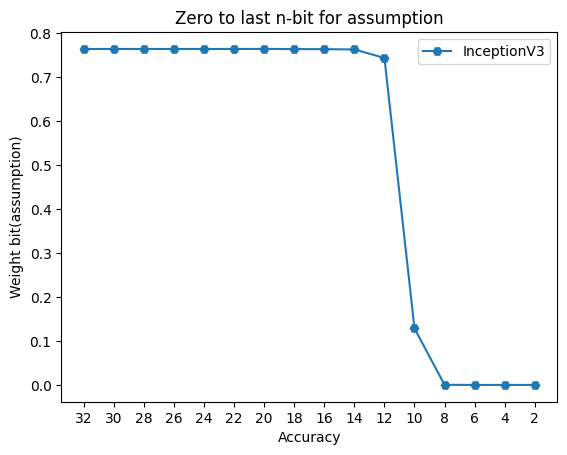

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend, accuracy_decend, marker='H')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption')
plt.legend(['InceptionV3'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend)

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 32~12비트까지 시각화

In [76]:
bit_decend[:11]

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12]

In [77]:
len(accuracy_decend[:11])

11

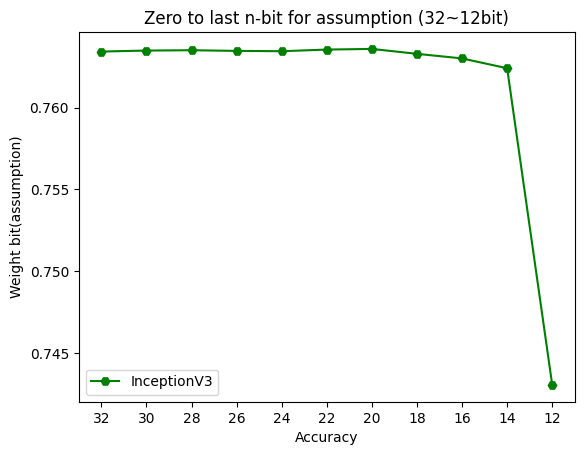

In [84]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[:11], accuracy_decend[:11], marker='H', color='green')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption (32~12bit)')
plt.legend(['InceptionV3'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[:11])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 12~2비트까지 시각화

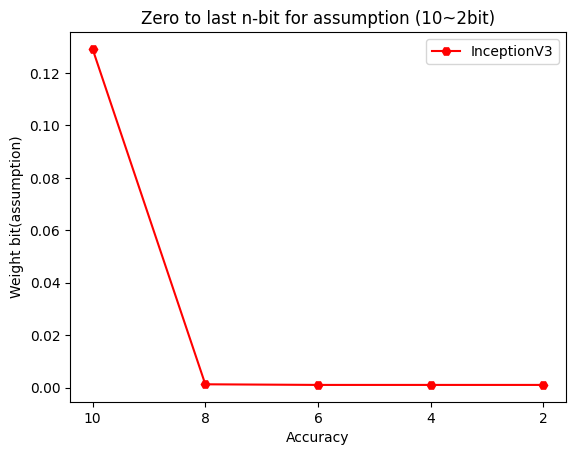

In [85]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[11:], accuracy_decend[11:], marker='H', color='red')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption (10~2bit)')
plt.legend(['InceptionV3'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[11:])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()